# Brain Tumor Segmentation using SLIC

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

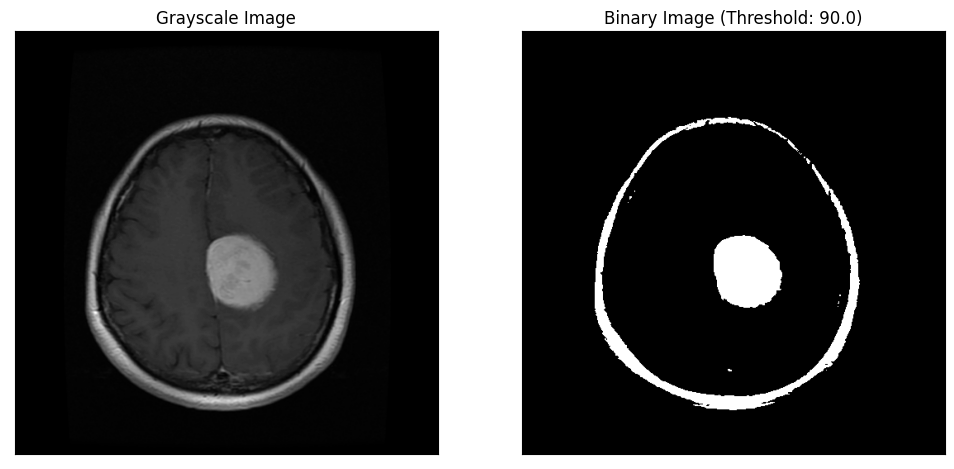

In [2]:
img = cv2.imread('C:/Users/user/Downloads/final year sem 1/VIP/project/brain tumor dataset/images/11.png', cv2.IMREAD_GRAYSCALE)

#simple global thresholding
ret,th1 = cv2.threshold(img,90,255,cv2.THRESH_BINARY)

plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.title('Grayscale Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(th1,cmap='gray')
plt.title('Binary Image (Threshold: '+str(ret)+')')
plt.xticks([]),plt.yticks([])
plt.show()

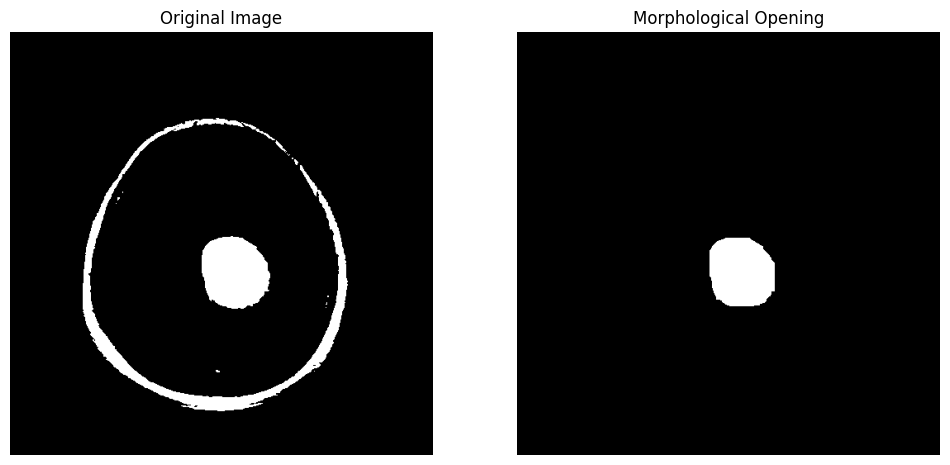

In [10]:
# morphological operations
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel, iterations=7)

# Display the original and the result
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(th1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Morphological Opening')
plt.imshow(closing, cmap='gray')
plt.axis('off')

plt.show()